In [4]:
from codex_test import dd2tsv
import re
import numpy as np
import pandas as pd
import logging

logger = logging.getLogger(__name__)

dd2tsv('ijcnlp_dailydialog', 'dd.tsv')
df = pd.read_csv('dd.tsv', sep='\t', header=0)

Things aren't adding up in line 672.
  Turn count: 12
  Act count: 11
  Feel count: 11



In [7]:
# How do dialog acts distribute across topic?
# Which topic has the highest ratio of act x

# finding: inform > question > directive > commissive act counts hold for each topic
# finding: tourism has highest ratio of commissive acts

# note: corpora size not uniform
# the relationship topic has the most turns (32,258)
# culture the fewest (558)
# tourism turn count: 8460

ordinary_df = df[df.topic_name=='ordinary']
school_df = df[df.topic_name=='school']
culture_df = df[df.topic_name=='culture']
attitude_df = df[df.topic_name=='attitude']
relationship_df = df[df.topic_name=='relationship']
tourism_df = df[df.topic_name=='tourism']
health_df = df[df.topic_name=='health']
work_df = df[df.topic_name=='work']
politics_df = df[df.topic_name=='politics']
finance_df = df[df.topic_name=='finance']

print(len(ordinary_df))
print(len(school_df))
print(len(culture_df))
print(len(attitude_df))
print(len(relationship_df))
print(len(tourism_df))
print(len(health_df))
print(len(work_df))
print(len(politics_df))
print(len(finance_df))

topic_dfs = (ordinary_df, school_df, culture_df, attitude_df, relationship_df, tourism_df, health_df, work_df, politics_df, finance_df)

from collections import Counter

def count_dialog_acts(topic_dfs):
    counters = []
    
    for topic in topic_dfs:
        cntr = Counter()
    
        for act in topic.act_name.values.tolist():
            cntr[act] += 1
        counters.append(cntr)
    return counters

act_counters = count_dialog_acts(topic_dfs)
for c in act_counters:
    print(c.most_common())
    
assert len(topic_dfs) == len(act_counters)
for i in range(len(topic_dfs)):
    print('inform', topic_dfs[i].head(1).topic_name.values, act_counters[i]['inform'] / len(topic_dfs[i]))
    print('question', topic_dfs[i].head(1).topic_name.values, act_counters[i]['question'] / len(topic_dfs[i]))
    print('directive', topic_dfs[i].head(1).topic_name.values, act_counters[i]['directive'] / len(topic_dfs[i]))
    print('commissive',topic_dfs[i].head(1).topic_name.values, act_counters[i]['commissive'] / len(topic_dfs[i]))
    print()



30080
4571
558
4284
32258
8460
2590
14400
1529
4238
[('inform', 12414), ('question', 8591), ('directive', 5480), ('commissive', 3595)]
[('inform', 1941), ('question', 1360), ('directive', 845), ('commissive', 425)]
[('inform', 316), ('question', 182), ('directive', 35), ('commissive', 25)]
[('inform', 2755), ('question', 980), ('directive', 291), ('commissive', 258)]
[('inform', 17815), ('question', 9497), ('directive', 2852), ('commissive', 2094)]
[('inform', 2957), ('question', 2314), ('directive', 2098), ('commissive', 1091)]
[('inform', 822), ('question', 774), ('directive', 738), ('commissive', 256)]
[('inform', 5377), ('question', 3943), ('directive', 3608), ('commissive', 1472)]
[('inform', 783), ('question', 499), ('directive', 180), ('commissive', 67)]
[('inform', 1348), ('question', 1284), ('directive', 1166), ('commissive', 440)]
inform ['ordinary'] 0.4126994680851064
question ['ordinary'] 0.2856050531914894
directive ['ordinary'] 0.18218085106382978
commissive ['ordinary'] 

<IPython.core.display.Javascript object>


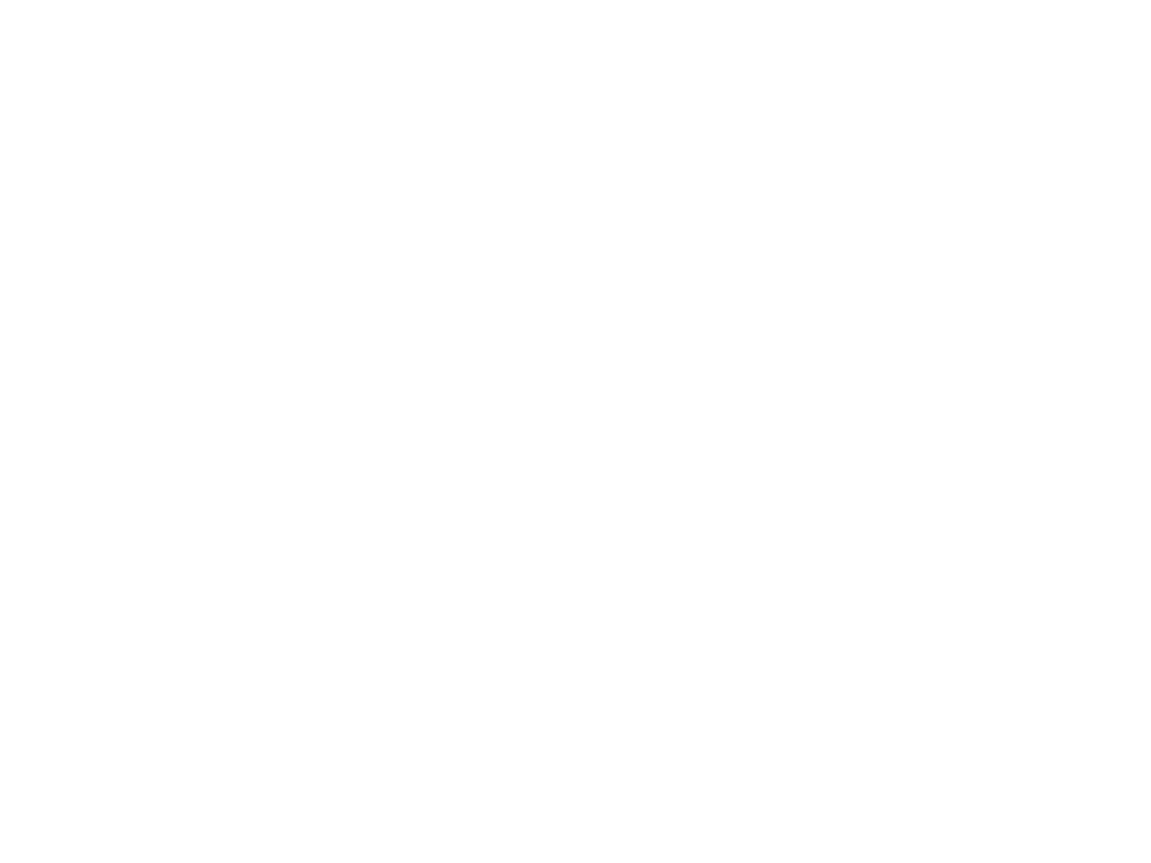

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

n_groups = 4

school = (42, 29, 18, 9)
attitude = (64, 22, 6, 6)
tourism = (34, 27, 24, 12)
finance = (31, 30, 27, 10)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, school, bar_width,
alpha=opacity,
color=(0.5,0.4,0.1),
label='School')

rects2 = plt.bar(index + bar_width, attitude, bar_width,
alpha=opacity,
color=(0.1, 0.2, 0.8),
label='Attitude')

rects3 = plt.bar(index + bar_width + bar_width, tourism, bar_width,
alpha=opacity,
color=(0.2, 0.4, 0.5),
label='Tourism')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, finance, bar_width,
alpha=opacity,
color=(0.1, 0.7, 0.5),
label='Finance')


plt.xlabel('Dialog Act')
plt.ylabel('Proportion of all turns by act')
plt.title('Dialog Acts by Topic')
plt.xticks(index + bar_width, ('Informative', 'Question', 'Directive', 'Commissive'))
plt.legend()

plt.tight_layout()
plt.show()

# i chose these four topics because they are relatively close in size
# i meant to draw attention to commissive acts being high in toursim
# not informative acts (most common act across all topics) being high for attitude